<a href="https://colab.research.google.com/github/inizek23/Projekt-PzAP/blob/main/PROJEKT_PzAP_Nizek_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analiza cijena goriva u odnosu na broj stanovnika i/ili ekonomsku razvijenost država**
**Projekt iz kolegija:** Programiranje za analizu podataka

**Fakultet organizacije i informatike, Sveučilište u Zagrebu**

**Izradio:** Ivan Nizek

Varaždin, Siječanj 2026

# **1.Uvod**


Cijene goriva postale su jedno od najvažnijih ekonomskih i društvenih pitanja. Hrvatska je izrazito ovisna o uvozu energenata, što znači da globalne promjene na tržištu nafte, geopolitičke krize i poremećaji u opskrbnim lancima vrlo brzo utječu na domaće cijene benzina i dizela. Budući da gorivo izravno utječe na troškove prijevoza, cijene hrane, logistiku i ukupnu inflaciju, razumijevanje čimbenika koji oblikuju cijene goriva postaje ključno za svakodnevni život građana i stabilnost gospodarstva.

Motivacija za odabir ove teme proizlazi iz činjenice da se Hrvatska posljednjih godina suočava s čestim promjenama cijena goriva, država često zamrzava cijene, a troškovima života stalno rastu. Analizom podataka o cijenama goriva u kombinaciji s ekonomskim pokazateljima poput broja stanovnika i BDP‑a po stanovniku moguće je dobiti jasniju sliku o tome kako se Hrvatska pozicionira u odnosu na druge zemlje te koliko je domaće tržište osjetljivo na globalne trendove.

Ovaj projekt koristi stvarne podatke (dataset o cijenama goriva i API podatke svjetske banke) kako bi se istražilo postoje li obrasci ili povezanosti između ekonomskih pokazatelja i kretanja cijena goriva.

#**2. Opis implementacije**

  Na početku izrade projekta napravio sam učitavanje svih potrebnih biblioteka,te sam započeo s učitavanjem svih potrebnih podataka. U ovome projektu koristim dva heterogena skupa podataka.
  1. Podatke o cijenama goriva preuzeo sam s platforme Kaggle(Petrol & Gas Prices Worldwide Dataset), podaci su iz 2022. godine i ovaj skup je u CSV formatu. Preuzeti su s sljedeće poveznice: https://www.kaggle.com/datasets/zusmani/petrolgas-prices-worldwide. Ovi podaci sadrže ključne informacije kao što su potrošnja po državi, cijena po galonu(USD), cijena po litri (USD), i cijena po litru izražena u pakistanskim rupijima.
  2. Podatke o ukupnom broju stanovnika i podatke o BDP-u po stanovniku dohvaćam putem World Bank Open Data API-ja u JSON formatu. U odabiru ova dva seta pomogla mi je umjetna inteligencija, tj. ChatGPT.
  
  Temeljem ta 3 skupa podataka planiram napraviti analizu utječu li podaci poput broja stanovnika i BDP-a po stanovniku na cijene goriva neke države.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests as req

# Učitavanje CSV datoteke
# Dodana je postavka encoding='latin1' za ispravno učitavanje datoteke
fuel_df = pd.read_csv("Petrol Dataset June 20 2022.csv", encoding='latin1')
fuel_df['Year'] = 2022  # cijeli dataset je za 2022.

# Prikaz prvih nekoliko redaka
fuel_df.head()

,#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),Year
0,1,United States,19687287,20.30%,934.3,5.19,1.37,289.97,2022
1,2,China,12791553,13.20%,138.7,5.42,1.43,302.87,2022
2,3,India,4443000,4.60%,51.4,5.05,1.33,281.93,2022
3,4,Japan,4012877,4.10%,481.5,4.69,1.24,262.05,2022
4,5,Russia,3631287,3.70%,383.2,3.41,0.90,190.56,2022


In [ ]:
# URL za broj stanovnika
population_url = "https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?format=json&per_page=20000"

# Dohvat podataka
population_data = req.get(population_url).json()
population_df = pd.DataFrame(population_data[1]) # Pretvaranje u DataFrame (drugi element liste sadrži podatke)

# Prikaz prvih redaka
population_df.head()

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2024,769280888.0,,,0
1,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2023,750491370.0,,,0
2,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2022,731821393.0,,,0
3,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2021,713090928.0,,,0
4,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2020,694446100.0,,,0


In [ ]:
# URL za BDP po stanovniku
gdp_url = "https://api.worldbank.org/v2/country/all/indicator/NY.GDP.PCAP.CD?format=json&per_page=20000"

# Dohvat podataka
gdp_data = req.get(gdp_url).json()
gdp_df = pd.DataFrame(gdp_data[1]) # Pretvaranje u DataFrame

# Prikaz prvih redaka
gdp_df.tail()

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
17285,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...","{'id': 'ZW', 'value': 'Zimbabwe'}",ZWE,1964,281.888369,,,1
17286,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...","{'id': 'ZW', 'value': 'Zimbabwe'}",ZWE,1963,277.147113,,,1
17287,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...","{'id': 'ZW', 'value': 'Zimbabwe'}",ZWE,1962,275.686274,,,1
17288,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...","{'id': 'ZW', 'value': 'Zimbabwe'}",ZWE,1961,279.158927,,,1
17289,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...","{'id': 'ZW', 'value': 'Zimbabwe'}",ZWE,1960,276.560896,,,1


U ovom dijelu projekta uspješno su učitana tri heterogena skupa podataka: CSV skup s podacima o cijenama goriva te dva JSON skupa dohvaćena putem World Bank API-ja koji sadrže demografske i ekonomske pokazatelje država. Prikazom prvih, odnosno zadnjih redaka potvrđena je ispravnost dohvaćanja podataka te je stvoren temelj za daljnje pretprocesiranje i integraciju.

# **2.1. Pretprocesiranje podataka**
Prije integracije heterogenih skupova podataka potrebno je razumjeti njihovu strukturu, format i kvalitetu kako bi se omogućila njihova uspješna obrada i spajanje. U fazi pretprocesiranja provedene su prilagodbe podataka koje uključuju učitavanje, čišćenje, standardizaciju i pripremu atributa potrebnih za kasniju integraciju. Ovi koraci osiguravaju da su svi izvori podataka kompatibilni i spremni za daljnju analizu.

In [ ]:
# Provjera osnovnih informacija o stupcima za podatke o gorivu
fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   #                                181 non-null    int64  
 1   Country                          181 non-null    object 
 2   Daily Oil Consumption (Barrels)  181 non-null    int64  
 3   World Share                      181 non-null    object 
 4   Yearly Gallons Per Capita        181 non-null    float64
 5   Price Per Gallon (USD)           181 non-null    float64
 6   Price Per Liter (USD)            181 non-null    float64
 7   Price Per Liter (PKR)            181 non-null    float64
 8   Year                             181 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 12.9+ KB


In [ ]:
fuel_df.describe(include='all')

,#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),Year
count,181.000000,181,1.810000e+02,181,181.000000,181.000000,181.000000,181.000000,181.0
unique,NaN,181,NaN,37,NaN,NaN,NaN,NaN,NaN
top,NaN,United States,NaN,0.02%,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,23,NaN,NaN,NaN,NaN,NaN
mean,91.000000,NaN,5.335730e+05,NaN,332.006630,5.695691,1.505138,318.219227,2022.0
std,52.394338,NaN,1.858067e+06,NaN,436.558735,4.370484,1.154575,244.192081,0.0
min,1.000000,NaN,5.100000e+01,NaN,2.200000,0.080000,0.020000,4.650000,2022.0
25%,46.000000,NaN,2.003600e+04,NaN,53.900000,4.150000,1.100000,232.020000,2022.0
50%,91.000000,NaN,6.161200e+04,NaN,180.200000,5.280000,1.400000,295.040000,2022.0
75%,136.000000,NaN,2.623520e+05,NaN,424.600000,6.760000,1.790000,377.740000,2022.0


In [ ]:
#Regije imaju country['id'] = ""
population_df = population_df[population_df['country'].apply(lambda x: x['id'] != "")]
gdp_df = gdp_df[gdp_df['country'].apply(lambda x: x['id'] != "")]

U ovom dijelu opisati ću zašto sam trebao dodati ćeliju iznad ovog teksta. U podacima koje sam uzeo iz World Bank API-ja imao sam listu država, ali u toj listi bile su i regije. primjerice osim država kao što su Hrvatska, Srbija, Sjedinjene Američke Države, u podacima postoje zapisi i za regije, npr: Europe & Central Asia, South East Africa, i sl. Morao sam filtrirati zapise kako bih uklonio regije. To sam postignuo provjerom ISO koda country_id koji je prazan za regije, a drefiniran za države.

Na taj način sam osigurao da se u daljnjoj obradi, a kasnije i u integraciji podataka, koriste samo valjani državni podaci.

In [ ]:
#Izvuci naziv države iz dict objekta
population_df['country_name'] = population_df['country'].apply(lambda x: x['value']) #apply prolazi kroz svaki zapis/redak, x je dict iz stupca country
gdp_df['country_name'] = gdp_df['country'].apply(lambda x: x['value'])

#Preimenujem kolone
pop = population_df[['countryiso3code', 'country_name', 'date', 'value']].rename(
    columns={'countryiso3code': 'country_code', 'date': 'Year', 'value': 'population'}
)

gdp = gdp_df[['countryiso3code', 'country_name', 'date', 'value']].rename(
    columns={'countryiso3code': 'country_code', 'date': 'Year', 'value': 'gdp_per_capita'}
)

# Pretvori godinu u int
pop['Year'] = pop['Year'].astype(int)
gdp['Year'] = gdp['Year'].astype(int)

# Filtriraj samo 2022.
pop = pop[(pop['Year'] == 2022) & (pop['population'].notna())]
gdp = gdp[(gdp['Year'] == 2022) & (gdp['gdp_per_capita'].notna())]

Kod iznad sastavni je dio pretpoceiranja podataka. Prvo sam kreirao nove stupce u oba dataframe-a jer sam morao izvuči nazive država. Nazivi država su se u mojim podacima nalazili u stupcu "country" koji je tipa dictionary. Morao sam iz tog dictionarya izvuči vrijednost(value) koju sam spremio u novi stupac "country_name".

Osim toga, ovaj kod uključuje preimenovanje stupaca, pretvaranje vrijednosti stupca "Year" (prije se zvao "date") u integer.

In [ ]:
!pip install thefuzz[speedup] #moramo ga prvo instlairati

Dio koda ispod je poslijednji dio pretprocesiranja. Ovdje se rješava problem neusklađenosti naziva država između osnovnog (CSV) skupa podataka i preuzetih podataka iz World Bank API-ja. Budući da se nazivi izvora u navedenim podacima često razlikuju, primjerice "United States" i "United States of America", izravna integracija podataka nije moguća. Pomoću fuzzy mapiranja pronađene su najveće podudarnosti između ovih izvora. Fuzzy mapiranje (biblioteka thefuzz), za svaki naziv države iz osnovnog skupa pronalazi najbliži naziv u API‑ju na temelju mjere sličnosti. Prvo se izdvajaju jedinstveni nazivi država iz oba izvora, a zatim se za svaki naziv iz CSV‑a pronalazi najbliži naziv iz API‑ja. Rezultat fuzzy mapiranja sprema se u rječnik, koji se zatim pretvara u tablični oblik (mapping_df).

Nakon toga, tablica podudarnosti spaja se s podacima iz API‑ja kako bi se svakom fuzzy‑mapiranom nazivu pridružio odgovarajući ISO kod države. Dobiveni kodovi dodaju se u glavni dataset spajanjem prema izvornom nazivu države.




In [ ]:
from thefuzz import process

fuel_countries = fuel_df['Country'].unique()
wb_countries = pop['country_name'].unique()

mapping = {}

for country in fuel_countries:
    match, score = process.extractOne(country, wb_countries) #traženje najbližeg naziva u APi-ju
    mapping[country] = match #stvaranje mape podudarnosti s nazivima

mapping_df = pd.DataFrame(list(mapping.items()), columns=['Country', 'wb_name'])

# Spoji s country_code
mapping_df = mapping_df.merge(
    pop[['country_name', 'country_code']].drop_duplicates(),
    left_on='wb_name',
    right_on='country_name',
    how='left'
)

# Spoji mapping na fuel_df
fuel_df = fuel_df.merge(
    mapping_df[['Country', 'country_code']],
    on='Country',
    how='left'
)
#Provjeri unmatched- dobra praksa da se provjeri je li neka država ostala nemapirana nakon fuzzy mapiranja...
unmatched = fuel_df[fuel_df['country_code'].isna()][['Country']].drop_duplicates()
print("Unmatched countries:")
print(unmatched)
#ako vraća popis bez vidljive države znači da su sve države se uspiješno mapirale.

Unmatched countries:
Empty DataFrame
Columns: [Country]
Index: []


## **2.2. Integracija podataka**
Nakon što su svi podaci kvalitetno pripremljeni, projekt može prijeći u fazu integracije. Cilj ovog koraka je spojiti prethodno obrađene skupove podataka u jedan, jedinstven dataset koji će se koristiti za daljnju analizu. Integracija se provodi spajanjem podataka o gorivu s podacima o populaciji, a potom spajanje podataka o BDP-u na prethodni set. Na kraju se uklanjaju svi redovi koji nemaju podatke o populaciji ili BDP-u.

In [ ]:
merged = fuel_df.merge(
    pop[['country_code', 'Year', 'population']],
    on=['country_code', 'Year'],
    how='left'
)

merged = merged.merge(
    gdp[['country_code', 'Year', 'gdp_per_capita']],
    on=['country_code', 'Year'],
    how='left'
)

# Makni redove bez podataka
merged = merged.dropna(subset=['population', 'gdp_per_capita'])

print("Final merged dataset:")
print(merged.head())
print(merged.info())

Final merged dataset:
   #        Country  Daily Oil Consumption (Barrels) World Share  \
0  1  United States                         19687287      20.30%   
1  2          China                         12791553      13.20%   
2  3          India                          4443000       4.60%   
3  4          Japan                          4012877       4.10%   
4  5         Russia                          3631287       3.70%   

   Yearly Gallons Per Capita  Price Per Gallon (USD)  Price Per Liter (USD)  \
0                      934.3                    5.19                   1.37   
1                      138.7                    5.42                   1.43   
2                       51.4                    5.05                   1.33   
3                      481.5                    4.69                   1.24   
4                      383.2                    3.41                   0.90   

   Price Per Liter (PKR)  Year country_code    population  gdp_per_capita  
0                 

Finalni dataset sadrži 177 država za koje su dostupni svi potrebni podaci. Integracija je uspješno spojila energetske, ekonomske i demografske informacije u jedinstvenu tablicu. Svi ključni stupci su popunjeni, a struktura podataka je čista i spremna za daljnju analizu i vizualizaciju.

## **2.3. Pohrana integriranog skupa podataka u bazu podataka**
Nakon što je finalni dataset uspješno integriran i očišćen, sljedeći korak je njegova trajna pohrana u lokalnu SQLite bazu podataka. Za tu svrhu koristi se SQLAlchemy, koji omogućuje jednostavno povezivanje Pandas DataFrame‑a s relacijskim bazama.

Nakon što je integrirani dataset spremljen u SQLite bazu, poželjno je provjeriti je li broj zapisanih redaka u bazi jednak broju redaka u DataFrame‑u. To se radi jednostavnim SQL upitom koji broji sve zapise u tablici fuel_economy.
Kao što vidimo ispisuje se, prvi ispis (broj redaka u dataframe-u prije nego što su poslani u bazu) ispisuje 177, isto kao i drugi ispis koji broji zapise u bazi pomoću SQL upita.

In [ ]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///fuel_economy.db')
merged.to_sql('fuel_economy', engine, if_exists='replace', index=False)

print("Broj zapisanih redaka u bazu:", len(merged))

Broj zapisanih redaka u bazu: 177


In [ ]:
df_check = pd.read_sql("SELECT COUNT(*) FROM fuel_economy", engine)
df_check

,COUNT(*)
0,177


# **3. Prikaz rada aplikacije**
Nakon što su podaci uspješno prikupljeni, očišćeni i integrirani u jedinstveni skup, sljedeći korak je prikazati kako aplikacija funkcionira u praksi te koje uvide omogućuje. U ovom poglavlju fokus je na vizualizacijama koje predstavljaju ključne odnose u podacima, poput povezanosti cijena goriva, potrošnje nafte, populacije i ekonomskih pokazatelja država. Svaki grafički prikaz popraćen je kratkim objašnjenjem koje opisuje što se iz vizualizacije može zaključiti i kako doprinosi razumijevanju globalnih energetskih i ekonomskih trendova. Ovaj dio predstavlja praktični rezultat cijelog procesa obrade podataka i omogućuje jasnu interpretaciju dobivenih informacija.

## **3.1. Opis prvog grafa**
Histogram prikazuje raspodjelu cijena goriva po litri u američkim dolarima za sve države u skupu podataka. Prema grafu se jasno vidi se većina zemalja nalazi u rasponu od 0 do 4 USD po litri goriva. Oblik distribucije podsjeća na zvonoliku raspodjelu, što znači da su srednje vrijednosti najčešće, dok su ekstremno niske ili ekstremno visoke vrijednosti cijene goriva rijetke.

Na desnom kraju grafa pojavljuje se manji broj država s izrazito visokim cijenama, uključujući nekoliko vrijednosti koje prelaze i 14 USD po litri. Te vrijednosti predstavljaju stršila, odnosno neuobičajeno visoke cijene koje značajno odskaču od globalnog prosjeka. Takvi ekstremi posljedica su visokih poreza na gorivo, loših ekonomskih uvjeta, ali moguće je i da se radi o otočnim državama koje imaju visoki trošak uvoza.

U cjelini, graf pokazuje da je globalno tržište goriva relativno stabilno u većini država, dok mali broj zemalja ima neuobičajeno visoke cijene koje narušavaju simetriju distribucije.

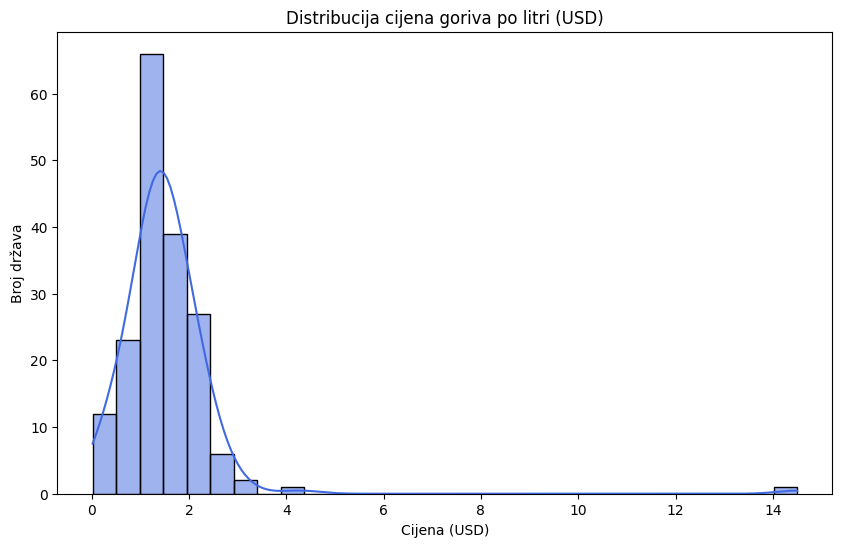

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(merged['Price Per Liter (USD)'], bins=30, kde=True, color='royalblue')
plt.title('Distribucija cijena goriva po litri (USD)')
plt.xlabel('Cijena (USD)')
plt.ylabel('Broj država')
plt.show()

## **3.2. Opis drugog grafa**
Graf prikazuje dvadeset država s najvišim cijenama goriva po litri, poredanih od najskuplje prema onim mnaje skupima.

Na samom vrhu nalazi se Sjeverna Koreja, s ekstremno visokom cijenom od oko 14 USD po litri, što je višestruko više od svih ostalih država na listi. Ova vrijednost predstavlja izraziti outlier i snažno odskače od globalnih trendova. Iza nje slijedi Tonga, s cijenom nešto iznad 4 USD, što je i dalje znatno iznad svjetskog prosjeka, ali daleko ispod ekstremne vrijednosti Sjeverne Koreje.

Cijene goriva u Sjevernoj Koreji dosežu ovakve ekstreme jer je Koreja pod teškim sankcijama UN-a koje ograničavaju količinu uvoza nafte i derivata, pa je ponuda goriva minimalna a cijene su ekstremne.Također, ona gotovo sav svoj uvoz goriva dobiva iz Kine, a kada se pojave glasine da bi Kina mogla smanjiti ili zaustaviti isporuke, cijene goriva u zemlji značajno porastu.

Ostatak država na listi grupira se u relativno ujednačen raspon cijena između 2 i 2.5 USD po litri. U toj skupini nalaze se zemlje poput Niuea, Hong Konga, Norveške, Danske, Finske, Islanda, Grčke, Nizozemske, Švedske, Portugala, Ujedinjenog Kraljevstva, Belgije, Estonije, Latvije, Barbadosa i drugih. Iako se radi o državama s visokim cijenama goriva, nijedna od njih ne pada ispod 2 USD po litri, što pokazuje da se radi o tržištima s visokim porezima, visokim troškovima uvoza ili specifičnim ekonomskim uvjetima.

/tmp/ipython-input-180962547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Price Per Liter (USD)', y='Country', palette='viridis')


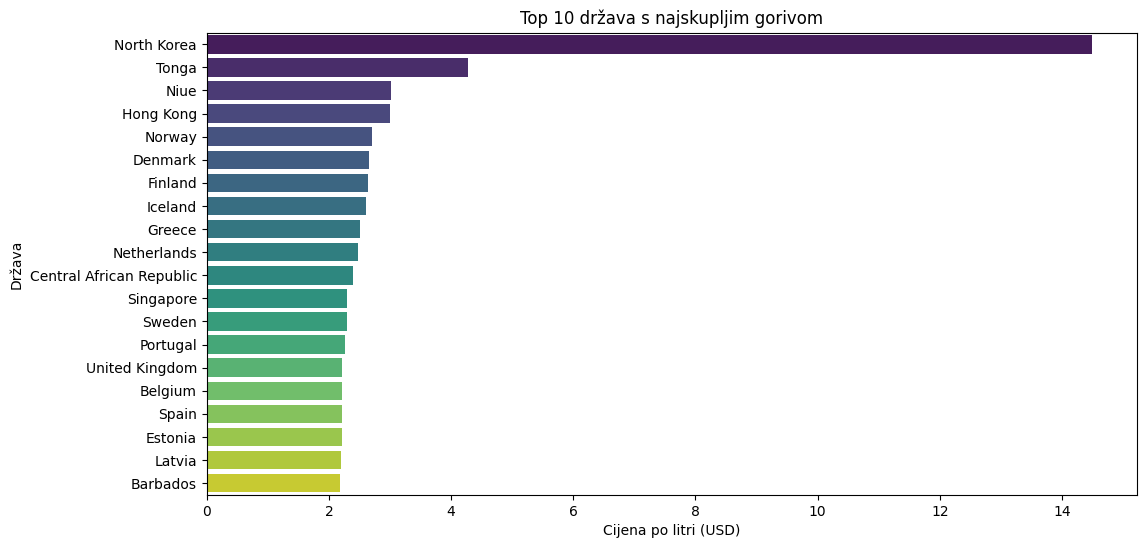

In [ ]:
top10 = merged.sort_values('Price Per Gallon (USD)', ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='Price Per Liter (USD)', y='Country', palette='viridis')
plt.title('Top 10 država s najskupljim gorivom')
plt.xlabel('Cijena po litri (USD)')
plt.ylabel('Država')
plt.show()

## **3.3. Opis trećeg grafa**
Ovaj scatterplot prikazuje odnos između cijene goriva po litri (USD) i BDP‑a po stanovniku za sve države u skupu podataka. Svaka točka predstavlja jednu državu.

Velika koncentracija točaka nalazi se u donjem lijevom dijelu grafa, što znači da su cijene goriva u većini zemalja ispod 2 USD po litri i da je BDP većine država u podacima niži od 30000 USD. Ovi podaci su očekivani jer većina temalja na svijetu pripada u srednje ili niže ekonomske skupine.

Linija koju vidimo na grafu, je regresijka linija i pokzuje nam blagi trend rasta cijene goriva u državama koje imaju viši BDP. Ovakav trend je također očekivan jer zemlje s višim BDP-om po stanovniku imaju i veće poreze.

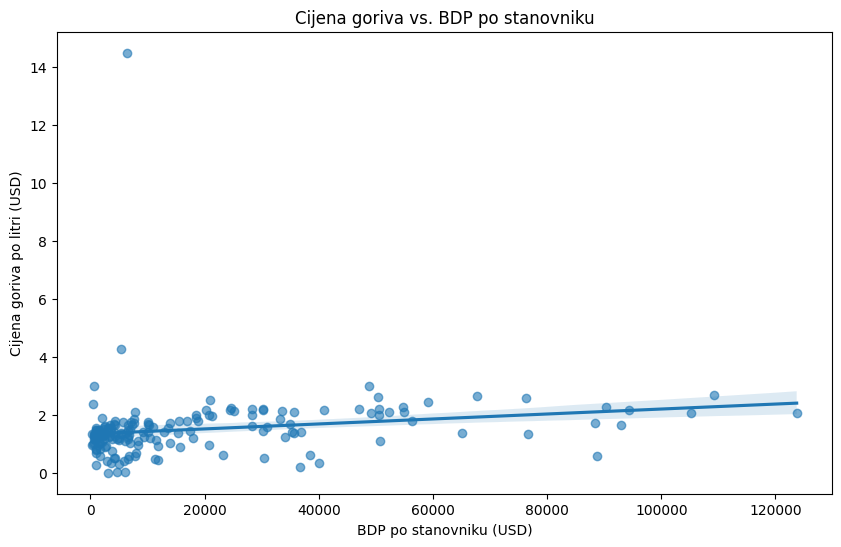

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=merged, x='gdp_per_capita', y='Price Per Liter (USD)', scatter_kws={'alpha':0.6})
plt.title('Cijena goriva vs. BDP po stanovniku')
plt.xlabel('BDP po stanovniku (USD)')
plt.ylabel('Cijena goriva po litri (USD)')
plt.show()

## **3.4. Opis četvrtog grafa**
Ovaj scatterplot prikazuje odnos između populacije države i njezine dnevne potrošnje nafte, pri čemu su obje osi prikazane u logaritamskoj skali. Logaritamska skala prikazuje jasnije uočavanje odnosa među državama koje imaju vrlo različite veličine populacije i potrošnje.

Na grafu se vidi da se većina točaka raspoređuje duž dijagonale, što znači da države s većom populacijom u pravilu imaju i veću potrošnju nafte. Međutim, raspored nije strogo linearan — točke su raspršene oko dijagonale, što pokazuje da populacija nije jedini faktor koji određuje potrošnju.

Posebno se ističu države koje imaju visoku populaciju, a nisku potrošnju. Zaključujem da takve zemlje imaju nizak BDP po stanovniku, manje su industrijalizirane i imaju niži stupanj motorizacije. To su neke velike, ali slabije razvijene zemlje, primjerice Bangladeš, Pakistan, DR Kongo... Ova stršila vizualno odstupaju od dijagonalnog trenda i pokazuju da potrošnja nafte nije samo funkcija broja stanovnika, nego i ekonomskog razvoja, industrijske strukture i dostupnosti energenata.



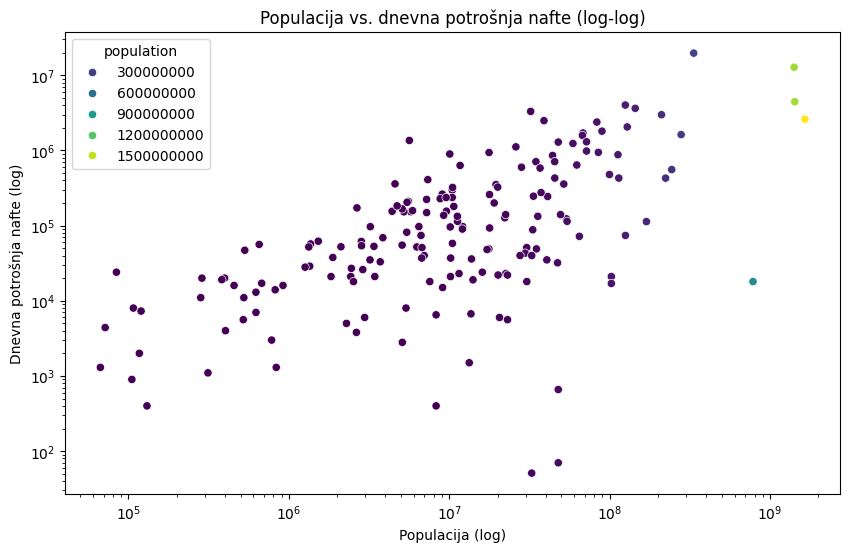

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged, x='population', y='Daily Oil Consumption (Barrels)', hue='population', palette='viridis')
plt.xscale('log')
plt.yscale('log')
plt.title('Populacija vs. dnevna potrošnja nafte (log-log)')
plt.xlabel('Populacija (log)')
plt.ylabel('Dnevna potrošnja nafte (log)')
plt.show()

## **3.5. Opis petog grafa**
Peti graf je zapravo matrica korelacije koja prikazuje odnose između pet ključnih varijabli: Price Per Liter (USD), Price Per Gallon (USD), Daily Oil Consumption (Barrels), Population, GDP per Capita.

Iz matrice jasno se vidi umjerena veza između populacije i dnevne potrošnje nafte. To znači da zaključak: veća populacija znači veću potrošnju nafte, nije netočan.

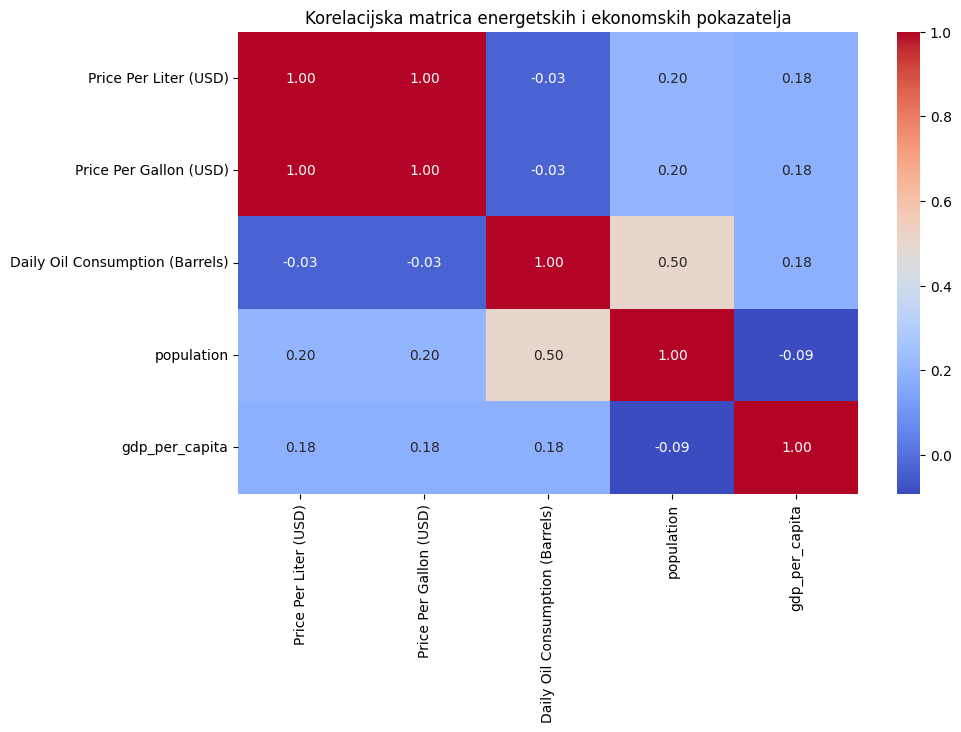

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(merged[['Price Per Liter (USD)', 'Price Per Gallon (USD)',
                    'Daily Oil Consumption (Barrels)', 'population',
                    'gdp_per_capita']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelacijska matrica energetskih i ekonomskih pokazatelja')
plt.show()

## **3.6. Opis šestog grafa**
U ovoj usporedbi vidimo četiri države koje su geografski blizu, ali imaju vrlo različite porezne politike, tržišne uvjete i valutne okolnosti.

Hrvatska ima najviše trošarine i PDV, pa je gorivo najskuplje. Slovenija ima državnu regulaciju cijena i niže poreze, što je čini najjeftinijom. Srbija i Bosna i Hercegovina imaju niže poreze i slabije valute, pa su njihove cijene goriva niže nego u Hrvatskoj, ali više ili usporedive sa Slovenijom.

/tmp/ipython-input-2488819343.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Country', y='Price Per Liter (USD)', palette='Blues')


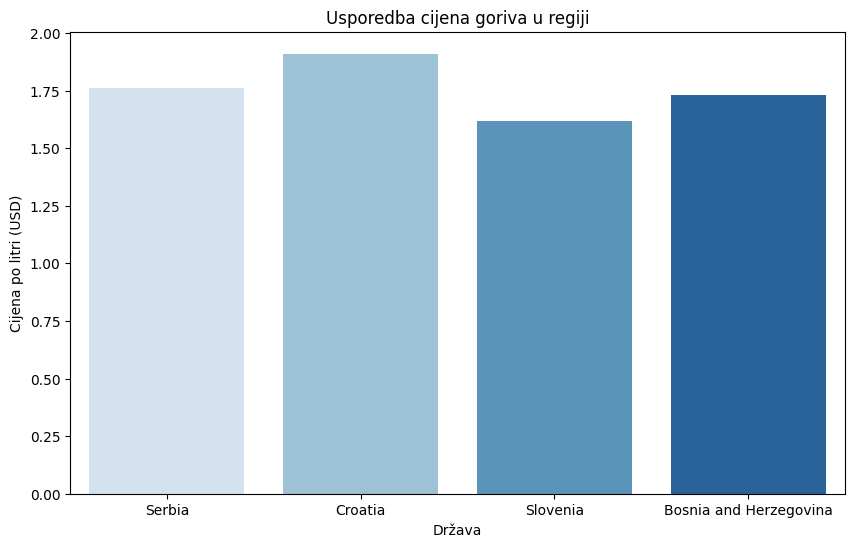

In [ ]:
countries = ['Croatia', 'Slovenia', 'Serbia', 'Bosnia and Herzegovina']
subset = merged[merged['Country'].isin(countries)]

plt.figure(figsize=(10,6))
sns.barplot(data=subset, x='Country', y='Price Per Liter (USD)', palette='Blues')
plt.title('Usporedba cijena goriva u regiji')
plt.xlabel('Država')
plt.ylabel('Cijena po litri (USD)')

plt.show()

# **4. REST API**
U završnom dijelu rada implementiran je jednostavan web API koji omogućuje pristup podacima iz prethodno kreirane baze podataka. API je izrađen korištenjem Flask okvira, dok se za komunikaciju s bazom koristi SQLAlchemy. Kako bi API bio dostupan izvan Colab okruženja, korišten je ngrok tunel koji lokalni server izlaže putem javno dostupnog URL‑a.

API sadrži nekoliko ruta koje omogućuju dohvat različitih skupova podataka. Osnovna ruta služi za provjeru rada sustava, dok ostale rute vraćaju konkretne informacije iz baze. Ruta "/countries" vraća popis svih država i njihovih kodova, što omogućuje jednostavnu identifikaciju zapisa. Još su implementirane rute za dohvaćanje pojedine države prema njenom ISO kodu. Dodatno su implementirane rute koje vraćaju rangirane podatke "/top/price" prikazuje deset država s najvišom cijenom goriva, dok "/top/consumption" vraća deset država s najvećom dnevnom potrošnjom nafte.

Svi podaci dohvaćaju se iz SQLite baze i vraćaju u JSON formatu, što API čini pogodnim za daljnju integraciju, vizualizaciju ili razvoj jednostavnih web aplikacija. Flask server pokreće se u pozadini kako bi Colab ostao interaktivan, dok ngrok omogućuje stabilan pristup API‑ju putem javnog URL‑a. Na ovaj način podaci obrađeni u analizi postaju dostupni kroz strukturirano i lako proširivo sučelje.

In [ ]:
!pip install flask pyngrok sqlalchemy

In [ ]:
!pip install flask pyngrok

In [ ]:
#38fJKuvCfKm0PS8IGpxBm7rGkCZ_5VBKffF66Gf7Edh8Z1gP token
from pyngrok import ngrok, conf

conf.get_default().auth_token = input("Enter your ngrok auth token: ")

# Open HTTP tunnel on port 5000
public_url = ngrok.connect(5001, "http").public_url

print(f" * ngrok HTTP tunnel available at: {public_url}")

Enter your ngrok auth token: 38fJKuvCfKm0PS8IGpxBm7rGkCZ_5VBKffF66Gf7Edh8Z1gP
 * ngrok HTTP tunnel available at: https://unchivalrous-spirited-esperanza.ngrok-free.dev


In [ ]:
import threading
from flask import Flask, jsonify
from sqlalchemy import create_engine

engine = create_engine('sqlite:///fuel_economy.db')

app = Flask(__name__)

@app.route("/")
def index():
    return "API radi!"

@app.route("/countries", methods=['GET'])
def get_countries():
    df = pd.read_sql("SELECT Country, country_code FROM fuel_economy", engine)
    return jsonify(df.to_dict(orient='records'))

@app.route("/country/<code>", methods=['GET'])
def get_country(code):
    query = f"SELECT * FROM fuel_economy WHERE country_code = '{code.upper()}'"
    df = pd.read_sql(query, engine)
    if df.empty:
        return jsonify({"error": "Country not found"}), 404
    return jsonify(df.to_dict(orient='records')[0])

@app.route("/top/price", methods=['GET'])
def top_price():
    df = pd.read_sql("""
        SELECT Country, country_code, `Price Per Liter (USD)`
        FROM fuel_economy
        ORDER BY `Price Per Liter (USD)` DESC
        LIMIT 10
    """, engine)
    return jsonify(df.to_dict(orient='records'))

@app.route("/top/consumption", methods=['GET'])
def top_consumption():
    df = pd.read_sql("""
        SELECT Country, country_code, `Daily Oil Consumption (Barrels)`
        FROM fuel_economy
        ORDER BY `Daily Oil Consumption (Barrels)` DESC
        LIMIT 10
    """, engine)
    return jsonify(df.to_dict(orient='records'))

def run_flask():
    app.run(host="0.0.0.0", port=5001, debug=False, use_reloader=False)

threading.Thread(target=run_flask).start()

 * Serving Flask app '__main__'
 * Debug mode: off


# **5. Kritički osvrt**
Što se tiče praktične izvodivosti, jasno se vidi da je moguće objediniti podatke o cijenama goriva, populaciji i ekonomskim pokazateljima država te ih učiniti dostupnima putem web API-a.

Ipak valja naglasiti ograničenja ovog sustava. Baza podataka je statična pa će podaci u njoj zastarjevati. Web API je javno dostupan samo kada se ručno pokrene preko Colaba i smatram da ovo nije dobro rješenje za APi koji planiramo korsititi u nekim drugim sustavima.

Smatram da bi se ovo rješenje, uz implementaciju značajnih promjena i uz naprednije tehničke kompetencije, moglo implementirati u stvarni sustav koji bi mogao ove podatke pratiti u realnom vremenu i imati stvarnu primjenu u praksi.

# **6. Zaključak**
U ovom projektu uspješno su prikupljeni, obrađeni i analizirani podaci o cijenama goriva, potrošnji nafte, populaciji i ekonomskim pokazateljima država. Kroz proces čišćenja podataka, spajanja različitih izvora i izrade vizualizacija dobiven je jasniji uvid u globalne energetske i ekonomske razlike. Analiza je pokazala da cijene goriva nisu jednostavno povezane s populacijom ili BDP‑om po stanovniku, dok se potrošnja nafte očekivano povećava s veličinom populacije. Uočeni su i ekstremni primjeri, poput izrazito visoke cijene goriva u Sjevernoj Koreji, što potvrđuje važnost političkih i tržišnih čimbenika koji nadilaze čisto ekonomske pokazatelje.

Osim analitičkog dijela, izrađen je i jednostavan web API koji omogućuje pristup podacima iz baze. Time je demonstrirana mogućnost pretvaranja statičke analize u funkcionalno sučelje koje može služiti kao temelj za daljnje aplikacije. Iako rješenje nije namijenjeno produkcijskoj upotrebi, ono jasno pokazuje kako se podaci mogu strukturirati, izložiti i koristiti u drugim sustavima.

Projekt u cjelini potvrđuje da se kombinacijom programskih alata, vizualizacija i jednostavnih web servisa može izgraditi sustav koji omogućuje razumijevanje i prezentaciju kompleksnih podataka. Dobiveni rezultati predstavljaju dobru osnovu za buduća proširenja, poput automatiziranog prikupljanja podataka, naprednijih analitičkih modela ili implementacije trajnog API‑ja.

# **7. Literatura**
1. Z. Usmani, Petrol/Gas Prices Worldwide, Kaggle, 2022.
Dostupno: https://www.kaggle.com/datasets/zusmani/petrolgas-prices-worldwide

2.  World Bank API, Population, total (SP.POP.TOTL), 2023.
Dostupno: https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?format=json&per_page=20000

3. World Bank API, GDP per capita (current US$) (NY.GDP.PCAP.CD), 2023.
Dostupno: https://api.worldbank.org/v2/country/all/indicator/NY.GDP.PCAP.CD?format=json&per_page=20000

4. Link na razgovor sa umjetnom inteligencijom (ChatGPT).
Dostupno: https://chatgpt.com/share/6973de02-50e8-8006-96ac-81f81a6dd141

5. Link na github repozitorij
Dostupno: https://github.com/inizek23/Projekt-PzAP